# Part_4: Stroke_Prediction - Tensorflow linear classifier 
7:45

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('c:/1/Stroke_Prediction_NUM.csv')
df.head(2)

,Unnamed: 0,ID,Gender,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke,Age_years,Age_years_10,Gender_C,Ever_Married_C,Type_Of_Work_C,Residence_C,Smoking_Status_C,Age_years_10_C
0,0,30650,Male,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,58.093151,"(53.126, 59.076]",1,1,2,1,1,5
1,1,57008,Female,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70.076712,"(65.121, 74.11]",0,1,2,0,0,7


### <span style="color:blue">Analiza poziomu zbilansowania zmiennej wynikowej</span>

In [2]:
del df['Unnamed: 0']
df.Stroke.value_counts(dropna = False, normalize=True)

0    0.981144
1    0.018856
Name: Stroke, dtype: float64

Zbiór zmiennych wynikowych wymaga zbilansowania. Do bilansowania zmiennych wynikowych stosuję trzy metody:
- class_weight (http://sigmaquality.pl/models/classification/logistic-regression/model-regresji-logistyczne-czesc-4-zastosowanie-class_weight/)
-  oversampling (http://sigmaquality.pl/models/classification/logistic-regression/model-regresji-logistycznej-czesc-2-oversampling/)
- zmiana progu (http://sigmaquality.pl/models/classification/logistic-regression/model-regresji-logistycznej-czesc-3-zmiana-progu-w-modelu-regresji-logistycznej/)

Wszystkie trzy metody powinny dać podobne efekty przy klasyfikacji. Dzisiaj do zbilansowania zbioru zastosuje metodę oversampling. Oversampling odbywa się na zbiorze treningowym więc najpierw trzeba podzielić zbiór na treningowy i testowy.

### <span style="color:blue">Podział na zbiór testowy i wynikowy</span>

In [3]:
df2 = df[['Hypertension','Heart_Disease','Avg_Glucose','BMI','Stroke','Age_years','Gender_C','Ever_Married_C','Type_Of_Work_C','Residence_C','Smoking_Status_C','Age_years_10_C']]

In [4]:
y = df2['Stroke']
X = df2.drop('Stroke', axis=1) 

In [5]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (19471, 11)
Zbiór X testowy:     (9591, 11)
Zbiór y treningowy:  (19471,)
Zbiór y testowy:     (9591,)


In [6]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  19104
ytrain = 1:  367


In [7]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ilość 0 Stroke na 1 Stroke: ', Proporcja)

Ilość 0 Stroke na 1 Stroke:  52


In [8]:
ytrain_OVSA = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_OVSA.count()

19084

Powiękrzyliśmy ilość zmiennych wynikowych 1. Teraz mamy tą samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych. Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.

In [9]:
Xtrain_OVSA = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_OVSA.count()

19084

In [10]:
ytrain_OVSA = pd.concat([ytrain, ytrain_OVSA], axis = 0).reset_index(drop = True)
Xtrain_OVSA = pd.concat([Xtrain, Xtrain_OVSA], axis = 0).reset_index(drop = True)

print("ilość elementów w zbiorze Xtrain:     ", Xtrain.BMI.count())
print("ilość elementów w zbiorze Xtrain_OVSA: ", Xtrain_OVSA.BMI.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OVSA: ", ytrain_OVSA.count())

ilość elementów w zbiorze Xtrain:      19471
ilość elementów w zbiorze Xtrain_OVSA:  38555
ilość elementów w zbiorze ytrain:      19471
ilość elementów w zbiorze ytrain_OVSA:  38555


Poziom zbilansowania zbioru wynikowego:

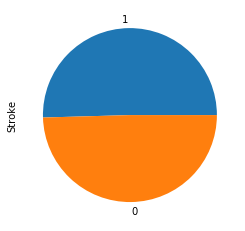

In [11]:
ytrain_OVSA.value_counts(dropna = False, normalize=True).plot(kind='pie')

### <span style="color:blue">Oversampling dla zbioru testowego</span>

In [12]:
print("ytest = 0: ", sum(ytest == 0))
print("ytest = 1: ", sum(ytest == 1))

ytest = 0:  9410
ytest = 1:  181


In [13]:
ProporcjaT = sum(ytrain == 0) / sum(ytrain == 1) 
ProporcjaT = np.round(ProporcjaT, decimals=0)
ProporcjaT = Proporcja.astype(int)
print('Ilość 0 Stroke na 1 Stroke: ', ProporcjaT)

Ilość 0 Stroke na 1 Stroke:  52


In [14]:
ytest_OVSA = pd.concat([ytest[ytest==1]] * ProporcjaT, axis = 0) 
ytest_OVSA.count()

9412

In [15]:
Xtest_OVSA = pd.concat([Xtest.loc[ytest==1, :]] * ProporcjaT, axis = 0)
ytest_OVSA.count()

9412

In [16]:
ytest_OVSA = pd.concat([ytest, ytest_OVSA], axis = 0).reset_index(drop = True)
Xtest_OVSA = pd.concat([Xtest, Xtest_OVSA], axis = 0).reset_index(drop = True)

print("ilość elementów w zbiorze Xtrain:     ", Xtest.BMI.count())
print("ilość elementów w zbiorze Xtrain_OVSA: ", Xtest_OVSA.BMI.count())
print("ilość elementów w zbiorze ytrain:     ", ytest.count())
print("ilość elementów w zbiorze ytrain_OVSA: ", ytest_OVSA.count())

ilość elementów w zbiorze Xtrain:      9591
ilość elementów w zbiorze Xtrain_OVSA:  19003
ilość elementów w zbiorze ytrain:      9591
ilość elementów w zbiorze ytrain_OVSA:  19003


### <span style="color:blue">Tensorflow neural network</span>

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\pyth

In [18]:
print("Using tensorflow Version %s" %tf.__version__)

Using tensorflow Version 1.5.0


In [19]:
df2.shape

(29062, 12)

In [20]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=12)

### <span style="color:blue">Definiowanie estymatora</span>

In [21]:
estimator = tf.estimator.LinearClassifier(feature_columns=[feat_column],
                                          n_classes=2,
                                          model_dir = "kernel_e"
                                         )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'kernel_e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002658C996358>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Zmiana wszystkich zmiennych numerycznych na zmienne TensorFlow

In [22]:
df2.columns

Index(['Hypertension', 'Heart_Disease', 'Avg_Glucose', 'BMI', 'Stroke',
       'Age_years', 'Gender_C', 'Ever_Married_C', 'Type_Of_Work_C',
       'Residence_C', 'Smoking_Status_C', 'Age_years_10_C'],
      dtype='object')

In [23]:
FEATURES  = ['Hypertension', 'Heart_Disease', 'Avg_Glucose', 'BMI', 'Stroke',
       'Age_years', 'Gender_C', 'Ever_Married_C', 'Type_Of_Work_C',
       'Residence_C', 'Smoking_Status_C', 'Age_years_10_C']

continuous_features = [tf.feature_column.numeric_column(k) for k in FEATURES]
continuous_features

[_NumericColumn(key='Hypertension', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Heart_Disease', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Avg_Glucose', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Stroke', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Age_years', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Gender_C', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Ever_Married_C', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Type_Of_Work_C', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Residence_C', shape=(1,), default_

### <span style="color:blue">Definiuje klasyfikator liniowy</span>

In [24]:
model = tf.estimator.LinearClassifier(
    n_classes = 2,
    model_dir="ongoing/ATOS7", 
    feature_columns=continuous_features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ongoing/ATOS7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002658A86F320>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### <span style="color:blue">Tworze funkcję wprowadzania</span>

In [25]:
FEATURES = ['Hypertension', 'Heart_Disease', 'Avg_Glucose', 'BMI', 'Stroke',
       'Age_years', 'Gender_C', 'Ever_Married_C', 'Type_Of_Work_C',
       'Residence_C', 'Smoking_Status_C', 'Age_years_10_C']
LABEL = 'Stroke'

def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set[LABEL].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

### <span style="color:blue">Trenowanie modelu</span>

In [26]:
df_train = pd.concat([Xtrain_OVSA, ytrain_OVSA], axis=1, sort=False) 
df_test = pd.concat([Xtest_OVSA, ytest_OVSA], axis=1, sort=False) 

In [27]:
model.train(input_fn=get_input_fn(df_train, 
                                num_epochs=None,
                                n_batch = 128,
                                shuffle=False),
                                steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ongoing/ATOS7\model.ckpt-21000
INFO:tensorflow:Saving checkpoints for 21001 into ongoing/ATOS7\model.ckpt.
INFO:tensorflow:loss = 0.17566305, step = 21001
INFO:tensorflow:global_step/sec: 309.824
INFO:tensorflow:loss = 0.08458078, step = 21101 (0.323 sec)
INFO:tensorflow:global_step/sec: 334.103
INFO:tensorflow:loss = 0.10183035, step = 21201 (0.299 sec)
INFO:tensorflow:global_step/sec: 350.839
INFO:tensorflow:loss = 0.03914675, step = 21301 (0.285 sec)
INFO:tensorflow:global_step/sec: 358.161
INFO:tensorflow:loss = 0.093212485, step = 21401 (0.295 sec)
INFO:tensorflow:global_step/sec: 330.96
INFO:tensorflow:loss = 0.058216006, step = 21501 (0.287 sec)
INFO:tensorflow:global_step/sec: 310.023
INFO:tensorflow:loss = 0.023705248, step = 21601 (0.323 sec)
INFO:tensorflow:global_step/sec: 332.06
INFO:tensorflow:loss = 0.13911867, step = 21701 (0.317 sec)
INFO:tensorflow:global_step/sec: 304.81
INFO:tensor

### <span style="color:blue">Ocena modelu</span>


In [31]:
model.evaluate(input_fn=get_input_fn(df_test, 
                                      num_epochs=1,
                                      n_batch = 128,
                                      shuffle=False),
                                      steps=1000)

INFO:tensorflow:Starting evaluation at 2020-03-03-10:11:05
INFO:tensorflow:Restoring parameters from ongoing/ATOS7\model.ckpt-31000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Finished evaluation at 2020-03-03-10:11:06
INFO:tensorflow:Saving dict for global step 31000: accuracy = 1.0, accuracy_baseline = 0.50481504, auc = 1.0, auc_precision_recall = 1.0, average_loss = 0.002097592, global_step = 31000, label/mean = 0.50481504, loss = 0.2675204, prediction/mean = 0.5035834


{'accuracy': 1.0,
 'accuracy_baseline': 0.50481504,
 'auc': 1.0,
 'auc_precision_recall': 1.0,
 'average_loss': 0.002097592,
 'label/mean': 0.50481504,
 'loss': 0.2675204,
 'prediction/mean': 0.5035834,
 'global_step': 31000}

In [48]:
y = model.predict(    
         input_fn=get_input_fn(df_test,                          
         num_epochs=1,                          
         n_batch = 256,                          
         shuffle=False))

In [49]:
y

<generator object Estimator.predict at 0x000002658EE2D728>

In [ ]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('ongoing/ATOS7')
    print("Model found.")

    saver.restore(sess, tf.train.latest_checkpoint('./'))
    print("Model restored compl.")

    z = tf.placeholder(tf.float32, shape= (None,38555))

    y_pred= y_pred.as_matrix()

    output =sess.run(z,feed_dict={Xtest_OVSA: y_pred})
    print(output)

In [53]:
output =sess.run(y,feed_dict={Xtest_OVSA: y_pred})

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

ERROR! Session/line number was not unique in database. History logging moved to new session 2654
